Problem Statement:

You are the data scientist at a telecom company named “Neo” whose customers are churning out to its competitors. You have to analyze the data of your company and find insights and stop your customers from churning out to other telecom companies.

Tasks To Be Performed:
1. Data Manipulation:   
● Extract the 5th row and store it in ‘customer_5’   
● Extract the 15th row and store it in ‘customer_15’   
● Extract all the male senior citizens whose payment method is electronic
check and store the result in ‘senior_male_electronic’  
● Extract all those customers whose tenure is greater than 70 months or
their monthly charges is more than $100 and store the result in ‘customer_total_tenure’   
● Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’   
● Extract 333 random records from the customer_churndataframe and store the result in ‘customer_333’    
● Get the count of different levels from the ‘Churn’ column

2. Data Visualization:  
● Build a bar-plot for the ’InternetService’ column:  
a. Set x-axis label to ‘Categories of Internet Service’   
b. Set y-axis label to ‘Count of Categories’  
c. Set the title of plot to be ‘Distribution of Internet Service’  
d. Set the color of the bars to be ‘orange’   
● Build a histogram for the ‘tenure’ column:  
a. Set the number of bins to be 30    
b. Set the color of the bins to be ‘green’     
c. Assign the title ‘Distribution of tenure’    
● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:  
a. Assign the points a color of ‘brown’   
b. Set the x-axis label to ‘Tenure of customer’     
c. Set the y-axis label to ‘Monthly Charges of customer’      
d. Set the title to ‘Tenure vs Monthly Charges’     
e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
y-axis &      
f. ‘Contract’ on the x-axis.

3. Linear Regression:   
● Build a simple linear model where dependent variable is ‘MonthlyCharges’
and independent variable is ‘tenure’:   
a. Divide the dataset into train and test sets in 70:30 ratio.  
b. Build the model on train set and predict the values on test set    
c. After predicting the values, find the root mean square error   
d. Find out the error in prediction & store the result in ‘error’   
e. Find the root mean square error

4. Logistic Regression:   
● Build a simple logistic regression model where dependent variable is
‘Churn’ and independent variable is ‘MonthlyCharges’:   
a. Divide the dataset in 65:35 ratio    
b. Build the model on train set and predict the values on test set    
c. Build the confusion matrix and get the accuracy score  
d. Build a multiple logistic regression model where dependent variable  
is ‘Churn’ and independent variables are ‘tenure’ and
‘MonthlyCharges’  
e. Divide the dataset in 80:20 ratio  
f. Build the model on train set and predict the values on test set  
g. Build the confusion matrix and get the accuracy score

5. Decision Tree:   
● Build a decision tree model where dependent variable is ‘Churn’ and
independent variable is ‘tenure’:   
a. Divide the dataset in 80:20 ratio    
b. Build the model on train set and predict the values on test set    
c. Build the confusion matrix and calculate the accuracy

6. Random Forest:   
● Build a Random Forest model where dependent variable is ‘Churn’ and
independent variables are ‘tenure’ and ‘MonthlyCharges’:    
a. Divide the dataset in 70:30 ratio    
b. Build the model on train set and predict the values on test set    
c. Build the confusion matrix and calculate the accuracy

In [ ]:
# Import all useful libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import csv file

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Projects/Mandatory/Customer Churn/Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [6]:
df['TotalCharges'].replace(' ', np.NaN, inplace= True)

In [7]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.corr()

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [ ]:
# Extract the 5th row and store it in ‘customer_5’

In [14]:
customer_5 = df.loc[5:5,'customerID':'Churn']
customer_5

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


In [ ]:
# Extract the 15th row and store it in ‘customer_15’

In [15]:
customer_15 = df.loc[15:15,'customerID':'Churn']
customer_15

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [ ]:
# Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’

In [16]:
senior_male_electronic = df[(df['gender']=='Male') & (df['SeniorCitizen']==1) & (df['PaymentMethod']=='Electronic check')]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.30,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.70,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.60,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.30,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [ ]:
# Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in ‘customer_total_tenure’

In [17]:
customer_total_tenure = df[(df['tenure']>70) | (df['MonthlyCharges']>100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No


In [ ]:
# Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’

In [18]:
two_mail_yes = df[(df['Contract']=='Two year') & (df['PaymentMethod']=='Mailed check') & (df['Churn']=='Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.60,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.30,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [ ]:
# Extract 333 random records from the customer_churndataframe and store the result in ‘customer_333’

In [19]:
customer_333 = df.sample(n=333, random_state=7)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2411,6901-GOGZG,Male,0,No,Yes,60,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,84.95,4984.85,No
5118,7621-VPNET,Female,0,Yes,No,42,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),85.90,3729.75,No
5724,8042-JVNFH,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,71.35,71.35,Yes
4774,7402-PWYJJ,Female,0,Yes,No,53,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,One year,Yes,Electronic check,91.15,4862.50,No
1877,7873-CVMAW,Male,0,No,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),88.55,6362.35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,8580-AECUZ,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.10,79.10,Yes
1709,3280-MRDOF,Male,1,No,No,30,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),69.10,2093.90,No
3632,2203-GHNWN,Female,0,Yes,No,24,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,79.65,1928.70,No
501,4513-CXYIX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Two year,Yes,Credit card (automatic),80.70,5676.00,No


In [73]:
# Get the count of different levels from the ‘Churn’ column

In [20]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [ ]:
# Build a bar-plot for the ’InternetService’ column:
# a. Set x-axis label to ‘Categories of Internet Service’
# b. Set y-axis label to ‘Count of Categories’
# c. Set the title of plot to be ‘Distribution of Internet Service’
# d. Set the color of the bars to be ‘orange’

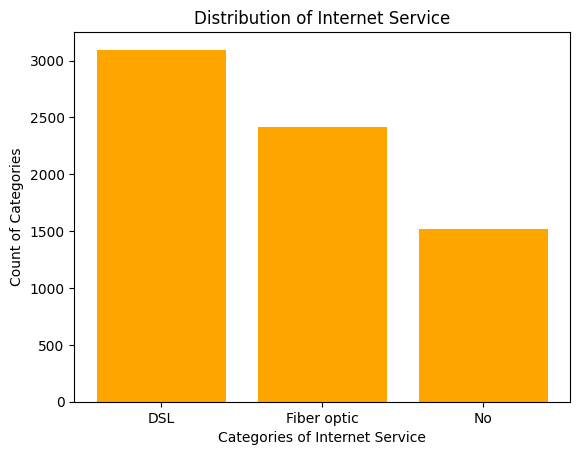

In [21]:
plt.bar(df['InternetService'].unique(), height=df['InternetService'].value_counts(), color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

In [74]:
# Build a histogram for the ‘tenure’ column:
# a. Set the number of bins to be 30
# b. Set the color of the bins to be ‘green’
# c. Assign the title ‘Distribution of tenure’

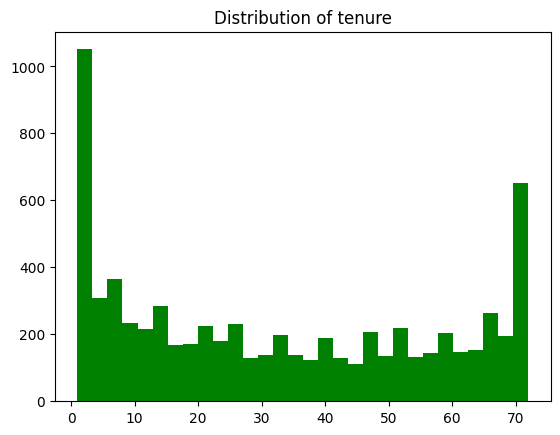

In [22]:
plt.hist(df['tenure'], bins=30, color='green')
plt.title('Distribution of tenure')
plt.show()

In [75]:
# Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
# a. Assign the points a color of ‘brown’
# b. Set the x-axis label to ‘Tenure of customer’
# c. Set the y-axis label to ‘Monthly Charges of customer’
# d. Set the title to ‘Tenure vs Monthly Charges’
# e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis &
# f. ‘Contract’ on the x-axis.

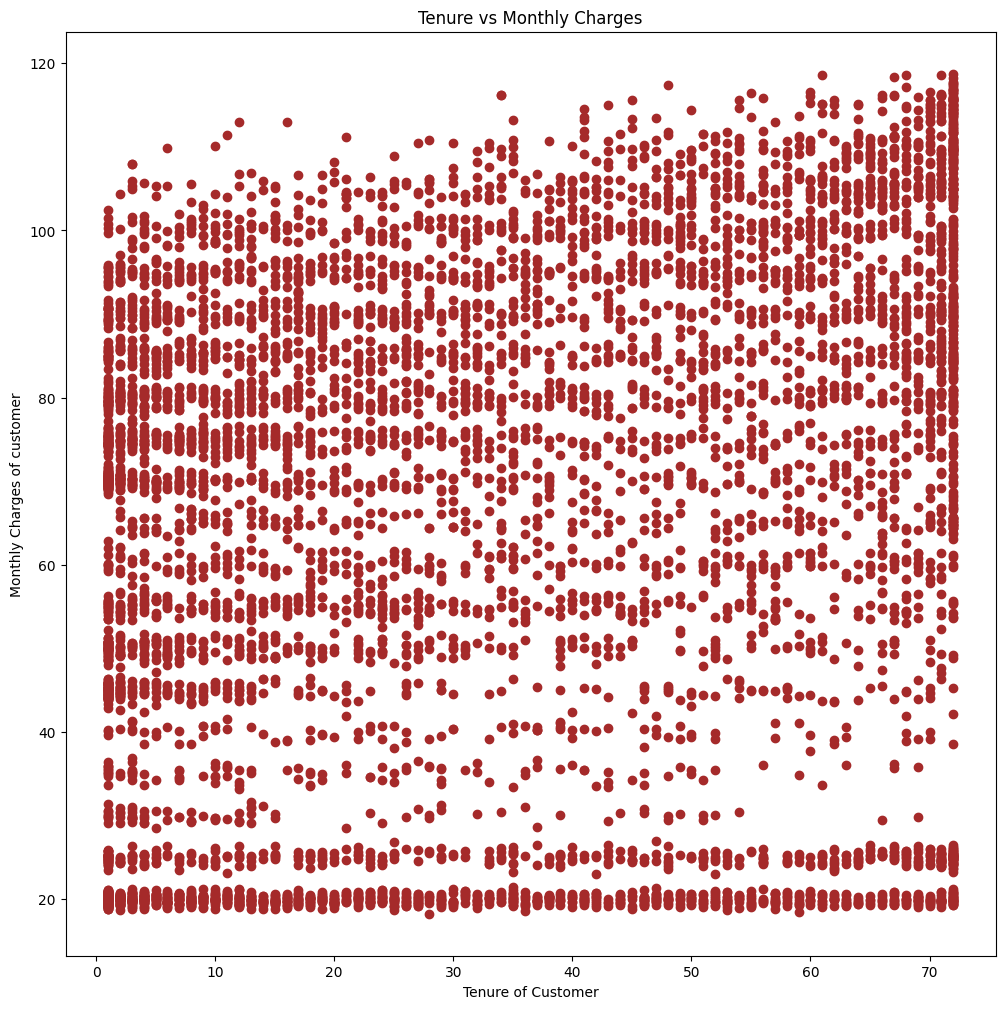

In [77]:
plt.figure(figsize=(12,12))
plt.scatter(df['tenure'], df['MonthlyCharges'], color = 'brown' )
plt.xlabel('Tenure of Customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

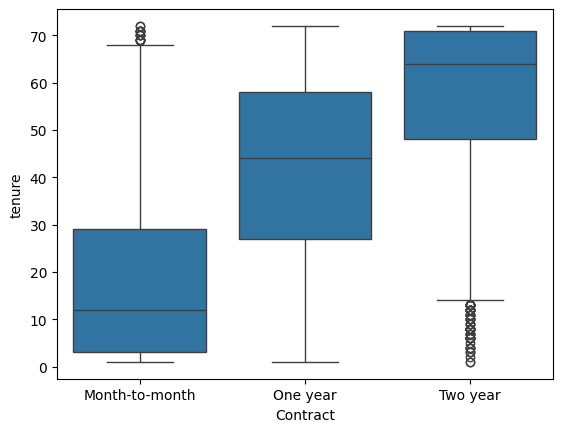

In [24]:
sns.boxplot(data= df, x='Contract', y='tenure')
plt.show()

In [ ]:
# Linear Regression:
# Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’:
# a. Divide the dataset into train and test sets in 70:30 ratio.
# b. Build the model on train set and predict the values on test set
# c. After predicting the values, find the root mean square error
# d. Find out the error in prediction & store the result in ‘error’
# e. Find the root mean square error

In [25]:
x=pd.DataFrame(df['tenure'])
x

,tenure
0,1
1,34
2,2
3,45
4,2
...,...
7038,24
7039,72
7040,11
7041,4


In [26]:
y=df['MonthlyCharges']
y

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7032, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_tr,x_te,y_tr,y_te=train_test_split(x, y, test_size=0.3)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lin=LinearRegression()
lin.fit(x_tr,y_tr)

LinearRegression()

In [31]:
y_pr=lin.predict(x_te)
y_pr

array([58.86590963, 62.87728488, 75.5285453 , ..., 55.78023636,
       72.75143935, 73.36857401])

In [66]:
import math
MSE = np.square(np.subtract(y_te, y_pr)).mean()
error = math.sqrt(MSE)
print('Root Mean Square Error with Linear Regression Model = ', error)

Root Mean Square Error with Linear Regression Model =  29.22443674338968


In [ ]:
# Logistic Regression:
# Build a simple logistic regression model where dependent variable is ‘Churn’ and independent variable is ‘MonthlyCharges’:
# a. Divide the dataset in 65:35 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and get the accuracy score
# d. Build a multiple logistic regression model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’
# e. Divide the dataset in 80:20 ratio
# f. Build the model on train set and predict the values on test set
# g. Build the confusion matrix and get the accuracy score

In [33]:
X=pd.DataFrame(df['MonthlyCharges'])
X

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70
...,...
7038,84.80
7039,103.20
7040,29.60
7041,74.40


In [34]:
Y=df['Churn']
Y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [35]:
X_tr,X_te,Y_tr,Y_te = train_test_split(X, Y, test_size=0.35)

In [36]:
from sklearn.linear_model import LogisticRegression
logi=LogisticRegression()
logi.fit(X_tr, Y_tr)

LogisticRegression()

In [37]:
Y_pr = logi.predict(X_te)
Y_pr

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(Y_te, Y_pr)

array([[1807,    0],
       [ 655,    0]])

In [67]:
acc=accuracy_score(Y_te, Y_pr)
print("Accuracy score with Logistic Regression Model =  ", acc)

Accuracy score with Logistic Regression Model =   0.7339561332250203


In [40]:
X1=df[['tenure','MonthlyCharges']]
X1

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70
...,...,...
7038,24,84.80
7039,72,103.20
7040,11,29.60
7041,4,74.40


In [41]:
Y1=df['Churn']
Y1

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [42]:
X_tra,X_tes,Y_tra,Y_tes = train_test_split(X1, Y1, test_size=0.20)

In [43]:
logi.fit(X_tra, Y_tra)

LogisticRegression()

In [44]:
Y_pre = logi.predict(X_tes)
Y_pre

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [45]:
confusion_matrix(Y_pre, Y_tes)

array([[948, 203],
       [ 82, 174]])

In [69]:
accu=accuracy_score(Y_tes, Y_pre)
print("Accuracy score with Logistic Regression Model =  ", accu)

Accuracy score with Logistic Regression Model =   0.7974413646055437


In [ ]:
# Decision Tree:
# Build a decision tree model where dependent variable is ‘Churn’ and independent variable is ‘tenure’:
# a. Divide the dataset in 80:20 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and calculate the accuracy

In [47]:
X2= df[['tenure']]
X2

,tenure
0,1
1,34
2,2
3,45
4,2
...,...
7038,24
7039,72
7040,11
7041,4


In [49]:
Y2=df['Churn']
Y2

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X2,Y2, test_size=0.2)

In [51]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()
dec.fit(X_train, Y_train)

DecisionTreeClassifier()

In [52]:
Y_pred = dec.predict(X_test)
Y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [53]:
confusion_matrix(Y_test, Y_pred)

array([[945,  62],
       [289, 111]])

In [71]:
accur=accuracy_score(Y_test, Y_pred)
print("Accuracy score with Decision Tree Model = ", accur)

Accuracy score with Decision Tree Model =  0.7505330490405118


In [ ]:
# Random Forest:
# Build a Random Forest model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’:
# a. Divide the dataset in 70:30 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and calculate the accuracy

In [55]:
X3=df[['tenure','MonthlyCharges']]
X3

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70
...,...,...
7038,24,84.80
7039,72,103.20
7040,11,29.60
7041,4,74.40


In [56]:
Y3=df['Churn']
Y3

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [57]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X3, Y3, test_size=0.30)

In [58]:
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier()
ran.fit(X_train1, Y_train1)

RandomForestClassifier()

In [59]:
Y_predict = ran.predict(X_test1)
Y_predict

array(['Yes', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [60]:
confusion_matrix(Y_predict, Y_test1)

array([[1313,  297],
       [ 236,  264]])

In [72]:
accuracy=accuracy_score(Y_predict, Y_test1)
print("Accuracy score with Random Forest Model = ", accuracy)

Accuracy score with Random Forest Model =  0.74739336492891
